In [1778]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, f_regression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

DATASET HAS BEEN TAKEN FROM KAGGLE

DATA:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

# GOAL

EDA of Working Environment in Tech Companies and building a model for the employees, predicting whether or not they should consider seeking treatment/therapy if they are suffering from mental illness.

In [1779]:
df=pd.read_csv('mental health in tech survey.csv')

In [1780]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [1781]:
df=df.drop(['Timestamp','comments'],axis=1)

In [1782]:
df=df.loc[df.Country=='United States']

In [1783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        751 non-null    int64 
 1   Gender                     751 non-null    object
 2   Country                    751 non-null    object
 3   state                      740 non-null    object
 4   self_employed              740 non-null    object
 5   family_history             751 non-null    object
 6   treatment                  751 non-null    object
 7   work_interfere             607 non-null    object
 8   no_employees               751 non-null    object
 9   remote_work                751 non-null    object
 10  tech_company               751 non-null    object
 11  benefits                   751 non-null    object
 12  care_options               751 non-null    object
 13  wellness_program           751 non-null    object
 14  seek_help

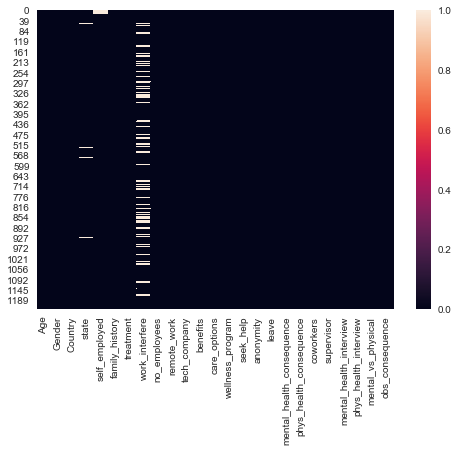

In [1784]:
sns.heatmap(df.isnull())

In [1785]:
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [1786]:
df=df.dropna()

In [1787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 18 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        588 non-null    int64 
 1   Gender                     588 non-null    object
 2   Country                    588 non-null    object
 3   state                      588 non-null    object
 4   self_employed              588 non-null    object
 5   family_history             588 non-null    object
 6   treatment                  588 non-null    object
 7   work_interfere             588 non-null    object
 8   no_employees               588 non-null    object
 9   remote_work                588 non-null    object
 10  tech_company               588 non-null    object
 11  benefits                   588 non-null    object
 12  care_options               588 non-null    object
 13  wellness_program           588 non-null    object
 14  seek_hel

In [1788]:
df.Age.describe()

count    588.000000
mean      33.641156
std       14.488748
min       -1.000000
25%       28.000000
50%       32.000000
75%       38.000000
max      329.000000
Name: Age, dtype: float64

In [1789]:
df=df.loc[(df.Age>18) & (df.Age<100),:]

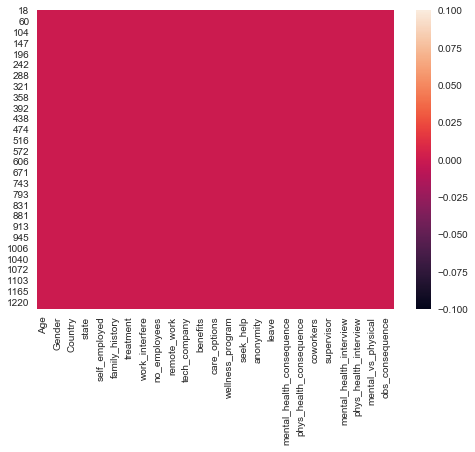

In [1790]:
sns.heatmap(df.isnull())

In [1791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 18 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        582 non-null    int64 
 1   Gender                     582 non-null    object
 2   Country                    582 non-null    object
 3   state                      582 non-null    object
 4   self_employed              582 non-null    object
 5   family_history             582 non-null    object
 6   treatment                  582 non-null    object
 7   work_interfere             582 non-null    object
 8   no_employees               582 non-null    object
 9   remote_work                582 non-null    object
 10  tech_company               582 non-null    object
 11  benefits                   582 non-null    object
 12  care_options               582 non-null    object
 13  wellness_program           582 non-null    object
 14  seek_hel

Some extreme values have been removed, following a normal distribution with max age between 28 to 35.

In [1792]:
df.Gender.unique()

array(['male', 'Male', 'Female', 'female', 'M', 'Male-ish',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'm', 'f',
       'queer/she/they', 'non-binary', 'woman', 'Make', 'Nah',
       'Genderqueer', 'Female ', 'cis-female/femme', 'Male ',
       'Trans woman', 'msle', 'Female (trans)', 'Female (cis)', 'Mail',
       'cis male', 'Woman', 'femail'], dtype=object)

In [1793]:
df['Gender']=df.Gender.replace(['male', 'Male', 'M', 'Male-ish','m','Male ','msle','Mail','Make'],'Male')
df['Gender']=df.Gender.replace(['Female', 'female','F','f','queer/she/they','woman','Female ','Woman','femail'],'Female')
df['Gender']=df.Gender.replace(['Trans-female', 'Cis Female', 'Cis Male','non-binary', 'Nah', 'Genderqueer', 'cis-female/femme','Trans woman', 'Female (trans)', 'Female (cis)', 'cis male', 'p'],'Others')

In [1794]:
df.Gender.unique()

array(['Male', 'Female', 'Others'], dtype=object)

# EDA 

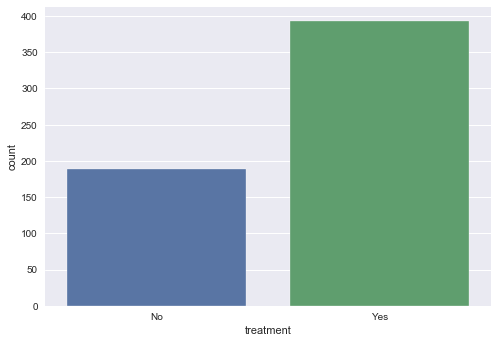

In [1795]:
sns.countplot(df.treatment)

TARGET CLASS IMBALANCED

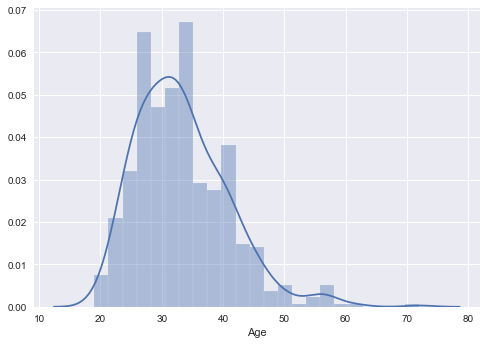

In [1796]:
sns.distplot(df.Age)

Max range between 28 to 35

In [1797]:
df['age_group']=pd.cut(df.Age,bins = [18,29,55,80],labels=['Young','Middle','Old'])


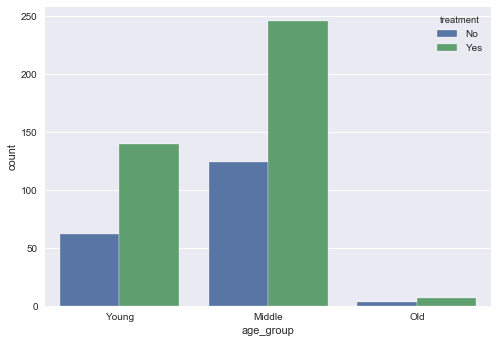

In [1798]:
sns.countplot(df.age_group,hue=df.treatment)

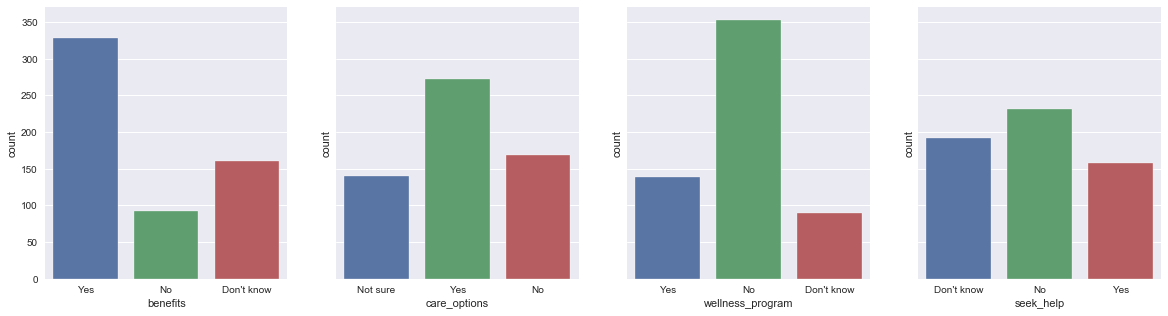

In [1799]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,sharey=True,figsize=(20,5))
sns.countplot('benefits',ax=ax1,data=df)
sns.countplot('care_options',data=df,ax=ax2)
sns.countplot('wellness_program',data=df,ax=ax3)
sns.countplot('seek_help',data=df,ax=ax4)


Most of the employers do provide mental health benefits, most of the employees are aware of the mental health care options as well but there is a significant proportion of population who are either unaware or do not seek help.
As a part of wellness program, majority of the employers DO NOT discuss or provide resources to learn about mental health issues or how to seek help.


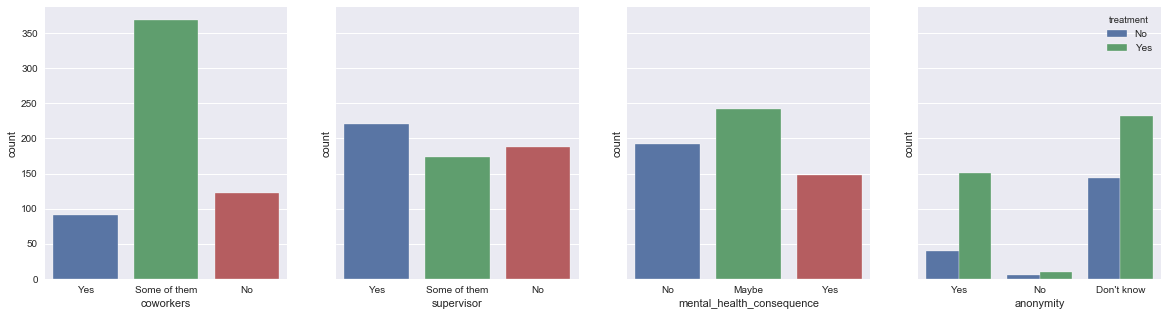

In [1800]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,sharey=True,figsize=(20,5))
sns.countplot('coworkers',ax=ax1,data=df)
sns.countplot('supervisor',data=df,ax=ax2)
sns.countplot('mental_health_consequence',data=df,ax=ax3)
sns.countplot(df.anonymity,hue=df.treatment,ax=ax4)

Looking above, employers are more comfortable in discussing this issue with thier supervisor whereas some with coworkers as well. Most of the employees are not sure about the fact whether discussing a mental health issue with your employer would have negative consequences or if thier anonymity is being protected or not. 
But it is clearly evident that the proportion of employees seeking treatment is different from those who know that thier anonymity is protected.



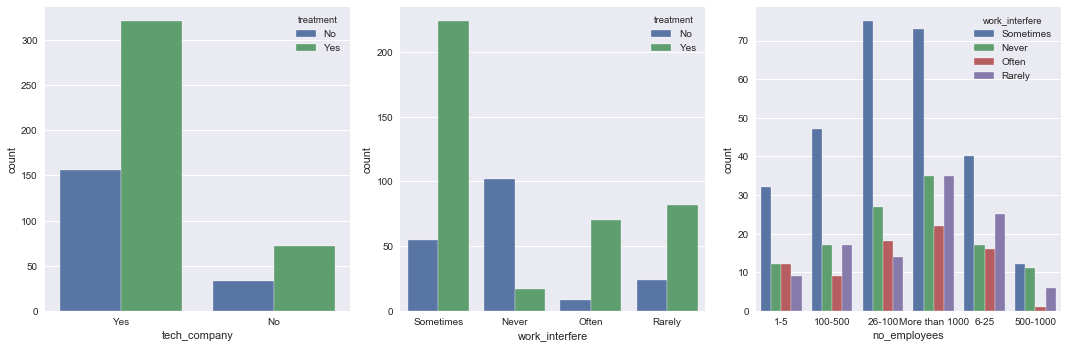

In [1801]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5),sharey=False)
sns.countplot(x='work_interfere',data=df,hue='treatment',ax=ax2)
sns.countplot(df.tech_company,hue=df.treatment,ax=ax1)
sns.countplot(df.no_employees,hue=df.work_interfere,ax=ax3)
plt.tight_layout()

More than half of the employees sought some kind of treatment whether or not they are working in tech. Majority of the employees claim that mental illness interferes with thier work and they have to seek some kind of treatment.Also if there are lesser no. of employees the work load is greater per employee resulting in more stressful environment.

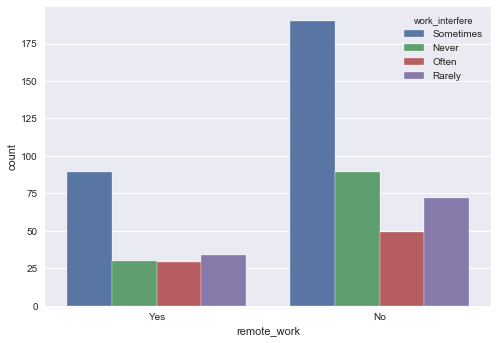

In [1802]:
sns.countplot(df.remote_work,hue=df.work_interfere)

Comparing the proportions, its is almost equal whether or not they are working remotely

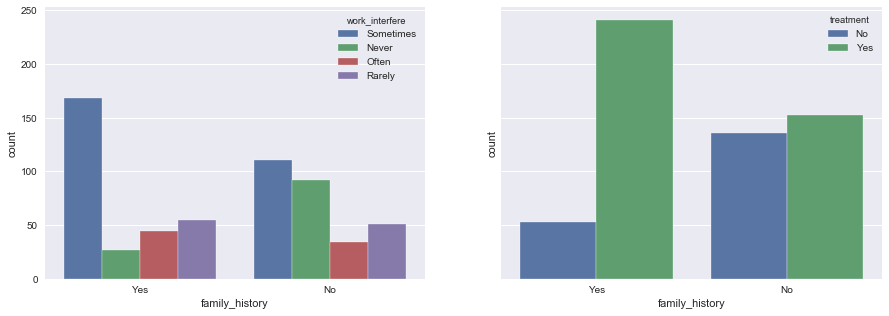

In [1803]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5),sharey=True)
sns.countplot('family_history',data=df,hue='treatment',ax=ax2)
sns.countplot(df.family_history,hue=df.work_interfere,ax=ax1)


Here, It can be clearly seen that employees having a family history of mental illness have more difficulty in concentrating in thier work and have sought treatment, it plays a big role in contributing to mental illness in the employees. 

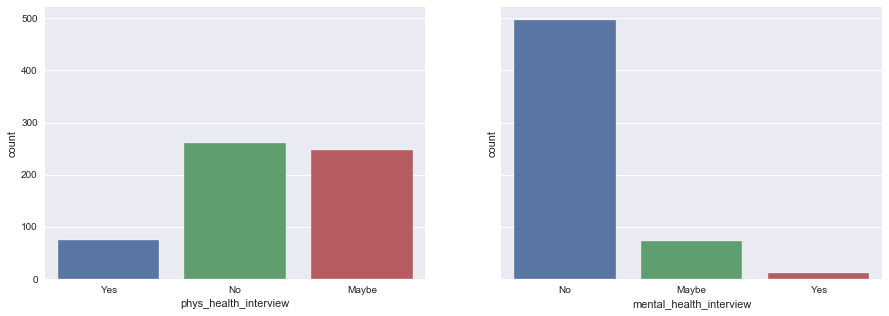

In [1804]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5),sharey=True)
sns.countplot(df.mental_health_interview,ax=ax2)
sns.countplot(df.phys_health_interview,ax=ax1)


During interviews, employees don't consider sharing if they had any mental health issue

In [1805]:
df.drop('Country',axis=1,inplace=True)

Text(0.5, 0, 'States')

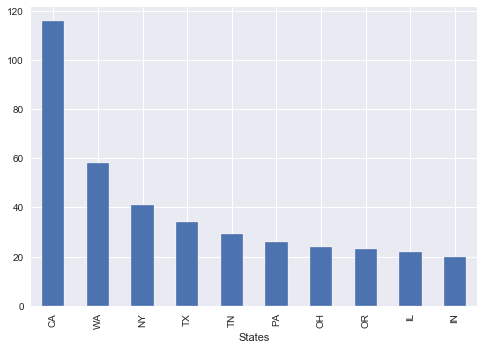

In [1806]:
df.state.value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('States')


The Silicon Valley in CA which is the hub of all the Tech Giants like Google,Facebook, Apple etc and several other tech based start-ups following the WA state(Amazon, Microsoft) has the most number employees bieng subjected to the highly competitive and stressful work environment.

According to the World Health Organization (WHO), one in four people suffer from mental health issue, with progressive urban centers — like Silicon Valley, San Francisco, etc. — often showing higher rates of manic depression, bipolar, and other like-minded illnesses.






Also in NYC Wall street, There is constant pressure to perform - to make money - in an ultra-competitive environment leading to a highly stressful environment.




In [1807]:
df.head()

,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
18,46,Male,MD,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,Middle
20,29,Male,NY,No,Yes,Yes,Sometimes,100-500,No,Yes,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,Young
21,31,Male,NC,Yes,No,No,Never,1-5,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,Middle
22,46,Male,MA,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,Middle
23,41,Male,IA,No,No,Yes,Never,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,Middle


In [1808]:
df.drop('Age',axis=1,inplace=True)

In [1809]:
df=df.reset_index(drop=True)

In [1810]:
df

,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
0,Male,MD,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,Middle
1,Male,NY,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,Young
2,Male,NC,Yes,No,No,Never,1-5,Yes,Yes,No,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,Middle
3,Male,MA,No,No,Yes,Often,26-100,Yes,Yes,Yes,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,Middle
4,Male,IA,No,No,Yes,Never,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Male,NC,No,Yes,Yes,Sometimes,100-500,Yes,Yes,Yes,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,Young
578,Male,UT,No,Yes,No,Rarely,More than 1000,No,No,Don't know,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,Middle
579,Male,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,Middle
580,Male,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,Middle


In [1811]:
df.state.value_counts().sort_values(ascending=False).head(10)

CA    116
WA     58
NY     41
TX     34
TN     29
PA     26
OH     24
OR     23
IL     22
IN     20
Name: state, dtype: int64

In [1812]:
top_10 = [x for x in df.state.value_counts().sort_values(ascending=False).head(10).index]
top_10

['CA', 'WA', 'NY', 'TX', 'TN', 'PA', 'OH', 'OR', 'IL', 'IN']

In [1813]:
for label in top_10:
    df[label] = np.where(df['state']==label, 1, 0)

df[['state']+top_10].head(10)

,state,CA,WA,NY,TX,TN,PA,OH,OR,IL,IN
0,MD,0,0,0,0,0,0,0,0,0,0
1,NY,0,0,1,0,0,0,0,0,0,0
2,NC,0,0,0,0,0,0,0,0,0,0
3,MA,0,0,0,0,0,0,0,0,0,0
4,IA,0,0,0,0,0,0,0,0,0,0
5,CA,1,0,0,0,0,0,0,0,0,0
6,TN,0,0,0,0,1,0,0,0,0,0
7,CA,1,0,0,0,0,0,0,0,0,0
8,OH,0,0,0,0,0,0,1,0,0,0
9,PA,0,0,0,0,0,1,0,0,0,0


In [1814]:
df.drop(['state'],axis=1,inplace=True)

In [1815]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [1816]:
df_dummies.columns

Index(['CA', 'WA', 'NY', 'TX', 'TN', 'PA', 'OH', 'OR', 'IL', 'IN',
       'Gender_Male', 'Gender_Others', 'self_employed_Yes',
       'family_history_Yes', 'treatment_Yes', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes',
       'no_employees_100-500', 'no_employees_26-100', 'no_employees_500-1000',
       'no_employees_6-25', 'no_employees_More than 1000', 'remote_work_Yes',
       'tech_company_Yes', 'benefits_No', 'benefits_Yes',
       'care_options_Not sure', 'care_options_Yes', 'wellness_program_No',
       'wellness_program_Yes', 'seek_help_No', 'seek_help_Yes', 'anonymity_No',
       'anonymity_Yes', 'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'menta

In [2324]:
X=df_dummies.drop(['treatment_Yes', 'TX', 'TN', 'PA', 'OH', 'OR', 'IL', 'IN'],axis=1)
y=df_dummies['treatment_Yes']

In [2325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [2326]:
X_train.shape,y_train.shape

((389, 48), (389,))

In [2327]:
X_test.shape,y_test.shape

((193, 48), (193,))

Oversampling the training set

In [2328]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()

In [2329]:
X_new_tr,y_new_tr= os.fit_sample(X_train,y_train)

In [2330]:
X_new_tr.shape,y_new_tr.shape

((532, 48), (532,))

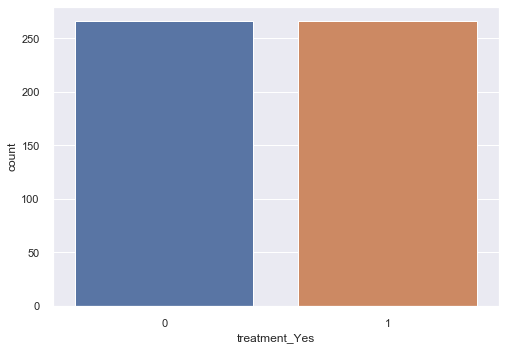

In [2331]:
sns.countplot(y_new_tr)

Oversampling the testing set

In [2332]:
X_new_ts,y_new_ts= os.fit_sample(X_test, y_test)

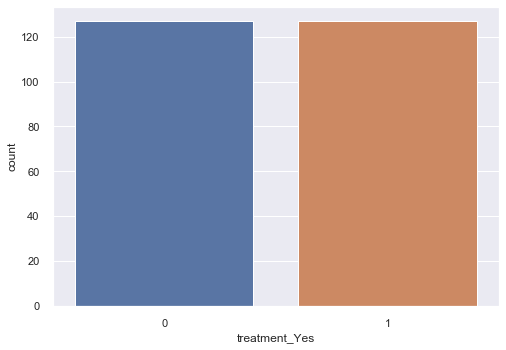

In [2333]:
sns.countplot(y_new_ts)

In [2334]:
training=pd.concat([X_new_tr,y_new_tr],axis=1)

In [2335]:
training.head()

,CA,WA,NY,Gender_Male,Gender_Others,self_employed_Yes,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes,age_group_Middle,age_group_Old,treatment_Yes
0,0,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,1
2,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [2336]:
from sklearn.feature_selection import chi2

In [2337]:
f_score = chi2(X_new_tr, y_new_tr)
f_score

(array([1.21904762e+01, 6.66666667e-01, 0.00000000e+00, 3.52195122e+00,
        1.42857143e-01, 6.09756098e-01, 2.67795918e+01, 3.52666667e+01,
        3.75324675e+00, 2.32033898e+01, 1.90476190e-01, 1.03418803e+00,
        3.03030303e-02, 1.20481928e-02, 1.04968944e+00, 3.10256410e+00,
        2.33100233e-03, 2.16216216e-01, 9.19081272e+00, 9.99270073e+00,
        2.47860465e+01, 6.01226994e-01, 7.08661417e-02, 4.78468900e-03,
        6.29370629e-02, 7.69230769e-02, 1.52439024e+01, 2.96296296e-01,
        8.25688073e-02, 7.11111111e+00, 0.00000000e+00, 1.43820225e+00,
        5.07936508e-01, 1.24050633e-01, 9.25925926e-01, 4.73372781e-02,
        1.80000000e+00, 5.58620690e-01, 1.33179724e+00, 5.01113586e-01,
        2.77777778e+00, 1.50000000e-01, 1.09649123e+01, 8.46153846e-01,
        2.57142857e-01, 3.96825397e-01, 1.07142857e-01, 9.09090909e-02]),
 array([4.80341200e-04, 4.14216178e-01, 1.00000000e+00, 6.05611105e-02,
        7.05456986e-01, 4.34879658e-01, 2.28032865e-07, 2.8751

In [2338]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_new_tr.columns
pvalues.sort_values(ascending=False)

NY                               1.000000e+00
leave_Very easy                  1.000000e+00
tech_company_Yes                 9.614927e-01
seek_help_No                     9.448532e-01
no_employees_6-25                9.125963e-01
no_employees_500-1000            8.618044e-01
coworkers_Some of them           8.277631e-01
seek_help_Yes                    8.019126e-01
wellness_program_Yes             7.900798e-01
anonymity_No                     7.815113e-01
leave_Somewhat easy              7.738460e-01
age_group_Old                    7.630246e-01
age_group_Middle                 7.434207e-01
phys_health_consequence_No       7.246821e-01
Gender_Others                    7.054570e-01
phys_health_interview_No         6.985354e-01
no_employees_100-500             6.625206e-01
benefits_No                      6.419382e-01
mental_vs_physical_Yes           6.120899e-01
leave_Somewhat difficult         5.862137e-01
obs_consequence_Yes              5.287333e-01
mental_health_interview_No       4

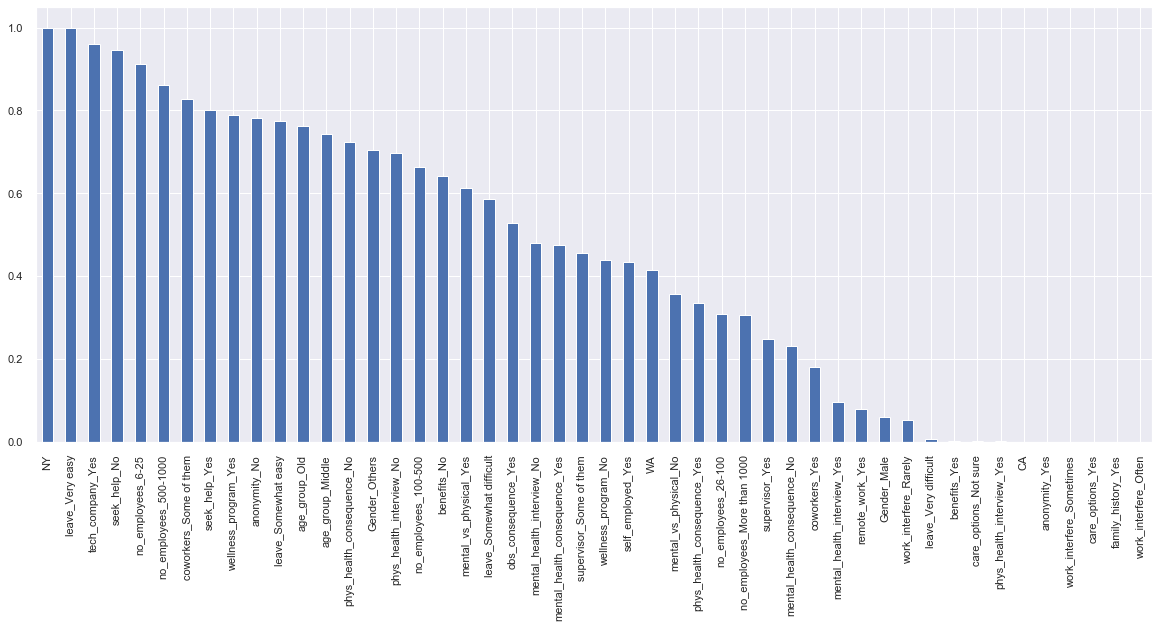

In [2339]:
pvalues.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [2340]:
sel_ = SelectKBest(chi2, k=20).fit(X_new_tr, y_new_tr)
X_new_tr.columns[sel_.get_support()]

Index(['CA', 'Gender_Male', 'family_history_Yes', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes',
       'no_employees_26-100', 'no_employees_More than 1000', 'remote_work_Yes',
       'benefits_Yes', 'care_options_Not sure', 'care_options_Yes',
       'anonymity_Yes', 'leave_Very difficult', 'mental_health_consequence_No',
       'phys_health_consequence_Yes', 'coworkers_Yes', 'supervisor_Yes',
       'mental_health_interview_Yes', 'phys_health_interview_Yes'],
      dtype='object')

In [2341]:
training_new=pd.concat([training[['CA', 'Gender_Male', 'family_history_Yes', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes', 'remote_work_Yes',
       'benefits_Yes', 'care_options_Not sure', 'care_options_Yes',
       'seek_help_Yes', 'anonymity_Yes', 'leave_Very difficult',
       'mental_health_consequence_Yes', 'phys_health_consequence_Yes',
       'mental_health_interview_Yes', 'phys_health_interview_Yes',
       'mental_vs_physical_Yes', 'obs_consequence_Yes', 'age_group_Old']],y_new_tr],axis=1)

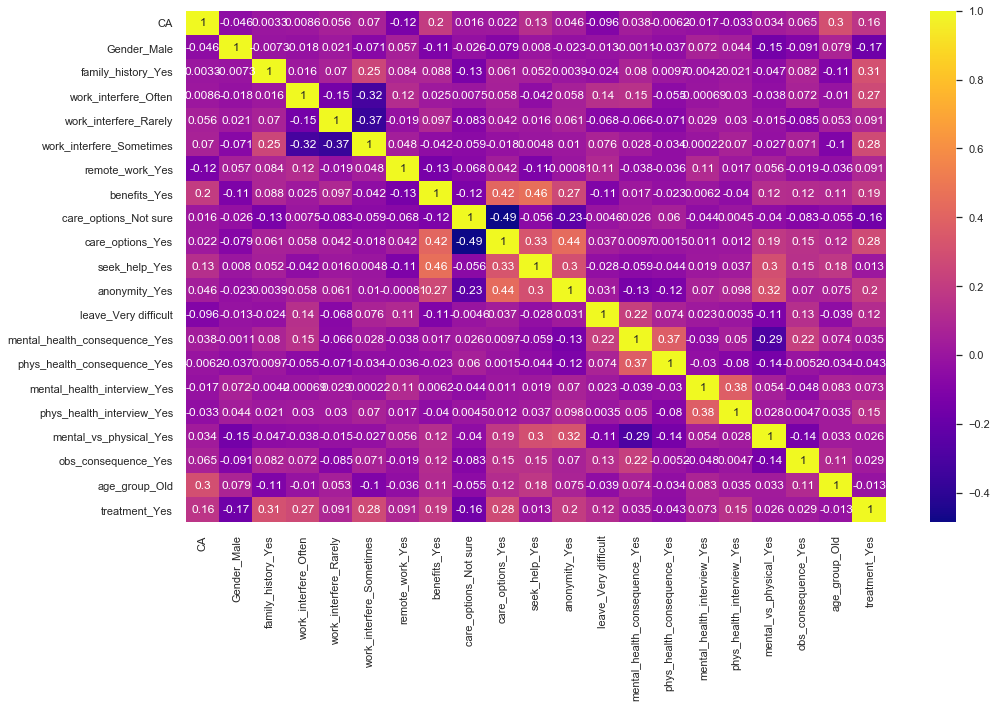

In [2503]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(training_new.corr(),annot=True,cmap='plasma')

plt.tight_layout()

Checking Multicollinearity

In [2343]:
X_new_tr=X_new_tr[['CA', 'Gender_Male', 'family_history_Yes', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes',
       'benefits_Yes', 'care_options_Not sure', 'care_options_Yes',
       'seek_help_Yes', 'anonymity_Yes', 'leave_Very difficult',
       'phys_health_interview_Yes',
       'age_group_Old']]


In [2344]:
X_new_tr.shape,y_new_tr.shape

((532, 14), (532,))

In [2345]:
X_new_ts=X_new_ts[['CA', 'Gender_Male', 'family_history_Yes', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes',
       'benefits_Yes', 'care_options_Not sure', 'care_options_Yes',
       'seek_help_Yes', 'anonymity_Yes', 'leave_Very difficult',
       'phys_health_interview_Yes',
       'age_group_Old']]


In [2346]:
X_new_ts.shape,y_new_ts.shape

((254, 14), (254,))

# Logistic with Lasso

In [2347]:
log=LogisticRegression(penalty='l1',solver='liblinear')

In [2348]:
log.fit(X_new_tr,y_new_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [2349]:
log_preds_training=log.predict(X_new_tr)

In [2350]:
print(classification_report(y_new_tr,log_preds_training))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       266
           1       0.80      0.80      0.80       266

    accuracy                           0.80       532
   macro avg       0.80      0.80      0.80       532
weighted avg       0.80      0.80      0.80       532



In [2351]:
log_preds=log.predict(X_new_ts)

In [2500]:
print(classification_report(y_new_ts,log_preds))
print(confusion_matrix(y_new_ts,log_preds))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       127
           1       0.77      0.85      0.81       127

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.79       254
weighted avg       0.80      0.80      0.79       254

[[ 94  33]
 [ 19 108]]


In [2509]:
log_score=cross_val_score(LogisticRegression(penalty='l1',solver='liblinear'),X,y,cv=5)

In [2510]:
round(log_score.mean(),2)

0.81

In [2512]:
log_score

array([0.79487179, 0.8034188 , 0.75862069, 0.8362069 , 0.85344828])

# SVM

In [2355]:
svc=SVC()

In [2356]:
svc.fit(X_new_tr,y_new_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Training

In [2357]:
svc_pred_train=svc.predict(X_new_tr)

In [2358]:
print(classification_report(y_new_tr,svc_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       266
           1       0.87      0.89      0.88       266

    accuracy                           0.88       532
   macro avg       0.88      0.88      0.88       532
weighted avg       0.88      0.88      0.88       532



Initial Testing

In [2359]:
svc_pred=svc.predict(X_new_ts)

In [2360]:
print(classification_report(y_new_ts,svc_pred))

              precision    recall  f1-score   support

           0       0.80      0.61      0.70       127
           1       0.69      0.85      0.76       127

    accuracy                           0.73       254
   macro avg       0.75      0.73      0.73       254
weighted avg       0.75      0.73      0.73       254



TUNING

In [2361]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[10,1,0.1,0.01,0.001,0.0001]}

In [2362]:
grid=GridSearchCV(estimator=svc,param_grid=param_grid,verbose=3)

In [2363]:
grid.fit(X_new_tr,y_new_tr)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.645, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.607, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.670, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.623, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.698, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.720, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.01, score=0.495, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.495, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.726, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.660, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.745, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.495, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.495, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ................... C=10, gamma=0.001, score=0.783, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.495, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.495, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.726, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.660, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.745, total=   0.0s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.832, total=   0.0s
[CV] C=100, gamma=10 .................................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.802, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.783, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.785, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.832, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.821, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.774, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.764, total=   0.0s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [2364]:
grid.best_params_

{'C': 1, 'gamma': 10}

In [2365]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [2366]:
grid_pred=grid.predict(X_new_ts)

In [2367]:
print(classification_report(y_new_ts,grid_pred))

              precision    recall  f1-score   support

           0       0.80      0.42      0.55       127
           1       0.61      0.90      0.72       127

    accuracy                           0.66       254
   macro avg       0.70      0.66      0.64       254
weighted avg       0.70      0.66      0.64       254



K FOLD

In [2497]:
SVM_score=cross_val_score(SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),X,y,cv=5)

In [2498]:
SVM_score.mean()

0.6752578838785736

# Bagging

In [2415]:
RF= RandomForestClassifier()
RF.fit(X_new_tr,y_new_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy

In [2416]:
RF_preds_train=RF.predict(X_new_tr)
print(classification_report(y_new_tr,RF_preds_train))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       266
           1       0.94      0.91      0.93       266

    accuracy                           0.93       532
   macro avg       0.93      0.93      0.93       532
weighted avg       0.93      0.93      0.93       532



Testing Accuracy

In [2417]:
RF_preds_test=RF.predict(X_new_ts)
print(classification_report(y_new_ts,RF_preds_test))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       127
           1       0.67      0.80      0.73       127

    accuracy                           0.70       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.71      0.70      0.70       254



# HYPERPARAMETER TUNING

In [2418]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}


In [2419]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_new_tr,y_new_tr)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [2420]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [2421]:
best_random_grid=rf_randomcv.best_estimator_

In [2422]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_new_ts)
print(classification_report(y_new_ts,y_pred))
print(confusion_matrix(y_new_ts,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.61      0.69       127
           1       0.68      0.83      0.75       127

    accuracy                           0.72       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.73      0.72      0.72       254

[[ 78  49]
 [ 22 105]]


In [2423]:


param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}


In [2424]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_new_tr,y_new_tr)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [2425]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 700}

In [2444]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [2443]:
best_grid=grid_search.best_estimator_

Testing Accuracy

In [2427]:
from sklearn.metrics import accuracy_score
y_pred=best_grid.predict(X_new_ts)
print(classification_report(y_new_ts,y_pred))
print(confusion_matrix(y_new_ts,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       127
           1       0.67      0.83      0.74       127

    accuracy                           0.71       254
   macro avg       0.73      0.71      0.71       254
weighted avg       0.73      0.71      0.71       254

[[ 75  52]
 [ 21 106]]


In [2459]:
RF_score=cross_val_score(RandomForestClassifier(criterion= 'entropy',
 max_depth=10,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=3,
 n_estimators=700),X,y,cv=5)

In [2463]:
round(RF_score.mean(),2)

0.77

# Boosting

In [2428]:
import xgboost as xgb
from xgboost import XGBClassifier

In [2429]:
model_xgb = XGBClassifier(objective='binary:logistic')


In [2430]:
model_xgb.fit(X_new_tr,y_new_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy

In [2431]:
y_pred_train = model_xgb.predict(X_new_tr)
print(classification_report(y_new_tr,y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       266
           1       0.82      0.86      0.84       266

    accuracy                           0.84       532
   macro avg       0.84      0.84      0.84       532
weighted avg       0.84      0.84      0.84       532



Initial Testing Accuracy

In [2436]:
y_pred_test= model_xgb.predict(X_new_ts)
print(classification_report(y_new_ts,y_pred_test))
print(confusion_matrix(y_new_ts,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       127
           1       0.72      0.84      0.78       127

    accuracy                           0.76       254
   macro avg       0.76      0.76      0.75       254
weighted avg       0.76      0.76      0.75       254

[[ 85  42]
 [ 20 107]]


# TUNING

In [2433]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20,50],
    'n_estimators':[10,50,100,200]
    
}

In [2434]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [2435]:
grid.fit(X_new_tr,y_new_tr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.804, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.832, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.774, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.698, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.764, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.785, total=   0.0s
[CV]  learning_rate=1, ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.792, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.785, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.841, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.877, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.783, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.792, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.794, total=   0.1s
[

[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.813, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.811, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.858, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.811, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=20, n_estimators=100, score=0.794, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=20, n_estimators=100, score=0.822, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=20, n_estimators=100, score=0.821, total=   0.

[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.794, total=   0.0s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.832, total=   0.0s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.849, total=   0.0s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.840, total=   0.0s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.783, total=   0.0s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.813, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.832, total

[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.858, total=   0.2s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.840, total=   0.2s
[CV]  learning_rate=0.5, max_depth=50, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=50, n_estimators=10, score=0.785, total=   0.0s
[CV]  learning_rate=0.5, max_depth=50, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=50, n_estimators=10, score=0.850, total=   0.0s
[CV]  learning_rate=0.5, max_depth=50, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=50, n_estimators=10, score=0.764, total=   0.0s
[CV]  learning_rate=0.5, max_depth=50, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=50, n_estimators=10, score=0.849, total=   0.0s
[CV]  learning_rate=0.5, max_depth=50, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=50, n_estimators=10, score=0.774

[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.849, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.821, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=0.804, total=   0.2s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=0.841, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=0.849, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=0.868, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=0.830, 

[CV]   learning_rate=0.1, max_depth=50, n_estimators=50, score=0.813, total=   0.1s
[CV]  learning_rate=0.1, max_depth=50, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=50, n_estimators=50, score=0.811, total=   0.1s
[CV]  learning_rate=0.1, max_depth=50, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=50, n_estimators=50, score=0.858, total=   0.1s
[CV]  learning_rate=0.1, max_depth=50, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=50, n_estimators=50, score=0.811, total=   0.1s
[CV]  learning_rate=0.1, max_depth=50, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=50, n_estimators=100, score=0.794, total=   0.1s
[CV]  learning_rate=0.1, max_depth=50, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=50, n_estimators=100, score=0.822, total=   0.2s
[CV]  learning_rate=0.1, max_depth=50, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=50, n_estimators=100, score=0.82

[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.830, total=   0.1s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=10, score=0.785, total=   0.0s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=10, score=0.850, total=   0.0s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=10, score=0.764, total=   0.0s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=10, score=0.849, total=   0.0s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=10, score=0.774, total=   0.0s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50 ..............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=50, score=

[CV]   learning_rate=0.01, max_depth=50, n_estimators=100, score=0.821, total=   0.1s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=100 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=100, score=0.858, total=   0.1s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=100 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=100, score=0.821, total=   0.1s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=200, score=0.794, total=   0.2s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=200, score=0.832, total=   0.2s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=200, score=0.830, total=   0.2s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=200,

[CV]   learning_rate=0.001, max_depth=10, n_estimators=50, score=0.811, total=   0.1s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50 .............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=50, score=0.858, total=   0.1s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50 .............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=50, score=0.811, total=   0.1s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=100, score=0.794, total=   0.1s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=100, score=0.832, total=   0.1s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=100, score=0.821, total=   0.1s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=

[CV]   learning_rate=0.001, max_depth=50, n_estimators=200, score=0.840, total=   0.2s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   45.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20, 50],
                         'n_estimators': [10,

In [2437]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}

In [2438]:
new_model=XGBClassifier(learning_rate=1,max_depth=5,n_estimators=200)

In [2439]:
new_model.fit(X_new_tr,y_new_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [2440]:
y_pred = new_model.predict(X_new_ts)
print(classification_report(y_new_ts,y_pred))
print(confusion_matrix(y_new_ts,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68       127
           1       0.68      0.83      0.74       127

    accuracy                           0.72       254
   macro avg       0.73      0.72      0.71       254
weighted avg       0.73      0.72      0.71       254

[[ 77  50]
 [ 22 105]]


In [2489]:
XG_score=cross_val_score(XGBClassifier(learning_rate=1,max_depth=5,n_estimators=200),X,y,cv=5)

In [2490]:
round(XG_score.mean(),2)

0.75

# Conclusion

With the current knowledge that I have in ML, I did some preprocessing, feature selection through a couple of techniques and found that the Logistic with Lasso reguralization seems to be an appropriate model looking at the F1 score of 78 and 81 for No treatment and treatment respectively and the mean cross validation score of 81%. The TPR and TPN in the model is also higher as compared to others, which can also tell if treatment is NOT required.

As the target class is highly imbalanced, I used Random oversampling seperately for both training and testing set to balance the target class, The Models are performing with a significantly higher accuracy if I just use oversampling on the entire dataset, which for obvious reasons will not construct a generalised model. Also to mention the original dataset is limited to only 582 rows.

 

                precision    recall  f1-score   support

           0       0.83      0.74      0.78       127
           1       0.77      0.85      0.81       127

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.79       254
weighted avg       0.80      0.80      0.79       254

MATRIX
         [ 94 33]
         
       [19 108]         
 
Out of 5CV:
            MAX=85.3%
            MIN=76
            MEAN=81%
 
 

With more Data, Domain Knowledge and feature selection, the accuracy can be increased and might also lead to a different generalized model.But for now, I will go with the Logistic with Lasso. 

Concluding, This model can help in suggesting as to whether an employee should consider seeking some sought of professional help, who can advise as to what kind of treatment/therapy is required.

